![alt text](1.png "Title")

Importing Neccessary Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
from hmmlearn import hmm

from scipy.stats import multivariate_normal

from google.colab import drive


In [5]:
!pip install hmmlearn

In [6]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Hands On/4/star_dataset.csv')
print('What dataset looks like:')
dataset

What dataset looks like:


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


### <font color=mediumpurple>1. Maximum Likelihood</font> ###

__Report Mean and Covariance values for each class__

#### <font color=slateblue>1.1 Class O</font> ####

In [8]:
datasetO = dataset[dataset['Spectral Class'] == 'O']
datasetO = datasetO[['Temperature (K)','Absolute magnitude(Mv)']]
datasetO.head()

,Temperature (K),Absolute magnitude(Mv)
30,39000,-4.70
99,36108,-4.40
101,40000,-6.23
102,23000,-5.76
103,17120,-6.89


In [9]:
covO = EmpiricalCovariance().fit(datasetO.to_numpy())
print("CLASS O: ")
print('\u03BC = ', covO.location_, sep="\n")
print('\u03A3 = ', covO.covariance_, sep="\n")

CLASS O: 
μ = 
[ 2.2294075e+04 -6.5961750e+00]
Σ = 
[[ 1.09342188e+08 -6.18115637e+02]
 [-6.18115637e+02  2.23654314e+00]]


#### <font color=slateblue>1.2 Class B</font> ####

In [10]:
datasetB = dataset[dataset['Spectral Class'] == 'B']
datasetB = datasetB[['Temperature (K)','Absolute magnitude(Mv)']]
datasetB.head()

,Temperature (K),Absolute magnitude(Mv)
20,25000,10.58
24,16500,11.89
31,30000,-4.20
32,15276,-1.97
33,9700,0.16


In [11]:
covB = EmpiricalCovariance().fit(datasetB.to_numpy())
print("CLASS B: ")
print('\u03BC = ', covB.location_, sep="\n")
print('\u03A3 = ', covB.covariance_, sep="\n")

CLASS B: 
μ = 
[1.95744783e+04 3.72260870e+00]
Σ = 
[[ 3.75467284e+07 -2.67843319e+04]
 [-2.67843319e+04  7.51544584e+01]]


### <font color=mediumpurple>2. Bayesian Density Estimation</font> ###
__1. Report Mean and Covariance values for each class__<br>

Selecting 2 Features:

In [12]:
dataset = dataset[(dataset['Spectral Class'] == 'B') | (dataset['Spectral Class'] == 'O')]
dataset2Features = dataset[['Temperature (K)','Absolute magnitude(Mv)']]
dataset2Features

,Temperature (K),Absolute magnitude(Mv)
20,25000,10.58
24,16500,11.89
30,39000,-4.70
31,30000,-4.20
32,15276,-1.97
...,...,...
233,27739,-7.59
234,21904,-7.67
235,38940,-9.93
236,30839,-10.63


In [13]:
BDE = BayesianGaussianMixture(n_components=2,covariance_type='full').fit(dataset2Features.to_numpy())
print('\u03BC = ', BDE.means_, sep="\n")
print('\u03A3 = ', BDE.covariances_, sep="\n")

μ = 
[[ 2.23633662e+04 -5.98818975e+00]
 [ 1.69991200e+04  1.12995213e+01]]
Σ = 
[[[ 8.50458323e+07 -1.97807062e+03]
  [-1.97807062e+03  5.75523056e+00]]

 [[ 1.72474771e+07 -4.40575423e+03]
  [-4.40575423e+03  9.39781798e+00]]]


### <font color=mediumpurple>3. Expectation Maximization</font> ###
__1. Report Mean and Covariance values for each class__<br>
__2. Plot the Clusters__

#### <font color=slateblue>1.</font> ####

In [14]:
GMM = GaussianMixture(n_components=2, covariance_type='full').fit(dataset2Features.to_numpy()) 
print('Converged:',GMM.converged_) 

if GMM.converged_:
  print('\u03BC = ', GMM.means_ , sep="\n")
  print('\u03A3 = ', GMM.covariances_, sep="\n")
else:
  print('Model not converged!')

Converged: True
μ = 
[[ 1.68391667e+04  1.18154167e+01]
 [ 2.23878871e+04 -6.06737097e+00]]
Σ = 
[[[ 1.49760780e+07 -1.80027465e+03]
  [-1.80027465e+03  6.74842493e-01]]

 [[ 8.65636517e+07 -1.56714093e+03]
  [-1.56714093e+03  4.44045265e+00]]]


#### <font color=slateblue>2.</font> ####

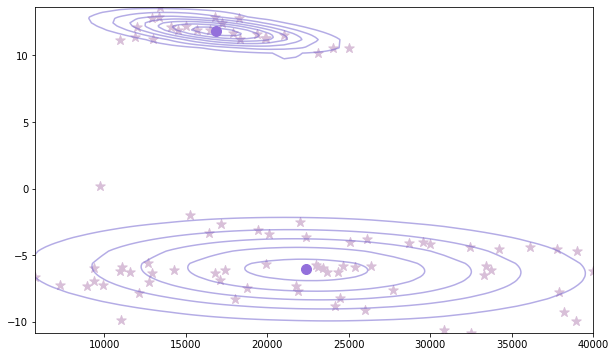

In [15]:
features = dataset2Features.to_numpy()
x,y = np.meshgrid(np.sort(features[:,0]), np.sort(features[:,1]))
XY = np.array([x.flatten(), y.flatten()]).T
  
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
ax0.scatter(features[:,0], features[:,1], color='thistle', marker='*', s=100)
for m,c in zip(GMM.means_, GMM.covariances_):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(features[:,0]), np.sort(features[:,1]),multi_normal.pdf(XY).reshape(len(features), len(features)), colors='slateblue',alpha=0.5)
    ax0.scatter(m[0],m[1], c='mediumpurple', zorder=10, s=100)
    
plt.show()


### <font color=mediumpurple>4. Multinomial HMM</font><br> ###

__1. Write the Transition Matrix and Emission Matrix__<br><br>
__2. What is the probability of <font color=slateblue>Sunny, Rainy, Rainy, Rainy, Snowy, Snowy</font>? (No need to code!)__<br><br>
__3. Suppose that a man wore <font color=slateblue>Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat</font>. What is the most likely weather condition in these 7 consecutive days?__

#### <font color=slateblue>1.</font> ####

Transition Matrix:

|         |   Sunny   |  Rainy  | Snowy  |
|---------|:-------- :|------:|------:|
|  Sunny  |    0.8   |  0.15  | 0.05  |
|   Rainy   |    0.38    |   0.6 |  0.02 |
|   Snowy   |    0.75    |   0.05|  0.2 |

Emission Matrix:

|         |   T-Shirt   |  Coat  |   Unbrella   |
|---------|:-------:|--------:|---------:|
|  Sunny  |    0.6  |  0.3    |    0.1   |
|   Rainy   |    0.05  |   0.3   |    0.65   |
|   Snowy   |    0.0  |   0.5   |    0.5   |

Initial Probability:

##### P(Sunny) = 0.7
##### P(Rainy)   = 0.25
##### P(Rainy)   = 0.05

#### <font color=slateblue>2.</font> ####



P(Given Sequence) = P(Sunny) * P(Rainy|Sunny) * P(Rainy|Rainy) * P(Rainy|Rainy) * P(Snowy|Rainy) * P(Snowy|Snowy) 

  = 0.7 * 0.15 * 0.6 * 0.6 * 0.02 * 0.2 = 0.0001512 

#### <font color=slateblue>3.</font> ####

In [16]:
states = ['Sunny', 'Rainy', 'Snowy']
numStates = len(states)

observations = ['T-shirt', 'Coat', 'Umbrella']
numObservations = len(observations)

model = hmm.MultinomialHMM(n_components = numStates, init_params= "", params= "")

model.startprob_ = np.array([0.7, 0.25, 0.05])    

model.transmat_ = np.array([
        [0.8, 0.15, 0.05], 
        [0.38, 0.6, 0.02],
        [0.75, 0.05, 0.2]])   
    
model.emissionprob_ = np.array([
        [0.6, 0.3, 0.1],
        [0.05, 0.3, 0.65],
        [0.0, 0.5, 0.5]])

sto = np.array([[1, 1, 2, 2, 0, 2, 1]]).T

model = model.fit(sto)
logprob, hs = model.decode(sto, algorithm="viterbi")
print("Observation:", sto.T)
print("States:", hs)

print("What the man was wearing or took with himself: ", ", ".join(map(lambda x: observations[int(x)], sto)))
print("The predicted states are: ", ", ".join(map(lambda x: states[int(x)], hs)))

Observation: [[1 1 2 2 0 2 1]]
States: [1 1 1 1 0 0 0]
What the man was wearing or took with himself:  Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat
The predicted states are:  Rainy, Rainy, Rainy, Rainy, Sunny, Sunny, Sunny
